# ***Bank recommendation system***

### Notebook for predicting products to purchase.


Author: David Jimenez

## INTRODUCTION
Being able to have an analysis of the basket of effective financial products is a challenge when it comes to satisfying the needs of customers within their life cycle of relationship with the entity. The final result translates into a recommendation engine that allows us to cover both the up-selling and cross-selling part.

<img src="https://drive.google.com/uc?export=view&id=14VkAcJDyLCrmRLkhCCUWjdZewr8MRUnd">

In this script you will have the historical hirings made by clients during their relationship with the Entity and a series of additional socio-demographic attributes that will allow you to further adjust the hiring profile. Through this information, we will predict the new financial products that each client will hire.

## THE DATASET
The sequence of historical hiring of a group of clients, individuals and autonomous, of the Cajamar Group is provided through 94 modalities of products including socio-demographic attributes. The challenge is to predict the next product to be hired by the customer and that would form their ideal future basket of financial products.

Dataset Training: The total number of records is 3,350,601 with 8 variables per record. With the Train file we are going to build a predictive model that allows determining the next product to be hired by the client, for this we have this transaction file where each record shows the hiring of a financial product per client, we will have as many records as historical hiring has the client.

#### Variables

*   *ID_Customer*: Customer identifier.
*   *Cod_Prod*: Code of the contracted product modality.
*  *Cod_Fecha*: Date of contracting the product modality. (Format YYYY-MM)
*  *Socio_Demo_01-05*: Socio-demographic variables related to the client.

The following variables are categorical (nominal):

*  Socio_Demo_01.

1: Age <18 years

2: Age> = 18 years and Age <30 years

3: Age> = 30 years and Age <45 years

4: Age> = 45 years and Age <65 years

5: Age> = 65 years

*  Socio_Demo_02.

1: Seniority <1 year

2: Antiquity> = 1 year and Antiquity <5 years

3: Antiquity> = 5 years and Antiquity <10 years

4: Antiquity> = 10 years and Antiquity <20 years

5: Antiquity> = 20 years

*  Socio_Demo_03.

1: Revenue <€ 6,000

2: Revenue> = € 6,000 and Income <€ 12,000

3: Income> = € 12,000 and Income <€ 24,000

4: Income> = € 24,000 and Income <€ 32,000

5: Revenue> = € 32,000


The following variables are categorical (nominal):

* *Cod_Prod*.: Code of the contracted product modality.
*  *Socio_Demo_04*: Sex (1: Man, 2: Woman)
*  *Socio_Demo_05*: Segment (00: Private | 01: Farmer | 02: Business | 03: Self-Employed)



#### Geographical scope: 
The analysis has information from customers throughout the Spanish territory.

#### Temporary window
All the hiring of financial products made by the client during his relationship with the Entity have been taken into account.

We begin to import the packages, modules and libraries that we are going to use.
The "projectFunctions.py" function is designed for the project and must be found in the same folder as this Notebook.

**Note**: for the execution of the code you must have installed the classifier xgboost, if we don't have it we can
<a href="https://pypi.python.org/pypi/xgboost/"> install easily </a> with * pip install xgboost *.

We choose a seed to make these results reproducible (tests have been done with seed 206).

In [0]:
import projectFunctions as pF
import pandas as pd
import matplotlib.pyplot as plt
from xgboost.sklearn import XGBClassifier
random_seed = 206

In [0]:
# Uncomment If we want to run the notebook in the free cloud Google Colab and run 
# this cell to upload data files: train.txt, test.txt, PIB.txt and projectFunctions.py

#from google.colab import files

#uploaded = files.upload()

#for fn in uploaded.keys():
#  print('User uploaded file "{name}" with length {length} bytes'.format(
#      name=fn, length=len(uploaded[fn])))

In [0]:
#!ls

PIB.txt		     projectFunctions.pyc  test.txt
projectFunctions.py  sample_data	   train.txt


### **Load data**

In the next cell we create a variable with the path of the training and test file. We use the *loadData ()* function that loads the data with the specified input format and sorts these by user and date.

In [0]:
# Load datasets
df_train = pF.loadData("train.txt")
df_train.head()

df_test = pF.loadData("test.txt")

In [0]:
df_train.shape

(3350601, 8)

In [0]:
n_users = df_train.ID_Customer.unique().shape[0]
n_items = df_train['Cod_Prod'].unique().shape[0]
print(str(n_users) + ' users') 
print(str(n_items) + ' products') 

676370 users
94 products


## Data Visualization
We are going to plot the differents variables with their values to visualizate the data.

In [0]:
df_train.groupby(['Socio_Demo_01']).size()

Socio_Demo_01
1      47430
2     282960
3    1077626
4    1355148
5     587437
dtype: int64

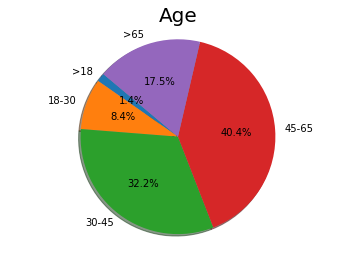

In [0]:
labels = '>18', '18-30','30-45','45-65', '>65'
sizes = [47430, 282960, 1077626, 1355148, 587437]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title('Age',fontsize=20)
plt.show()


In [0]:
df_train.groupby(['Socio_Demo_02']).size()

Socio_Demo_02
1      18221
2     279788
3     478017
4    1312300
5    1262275
dtype: int64

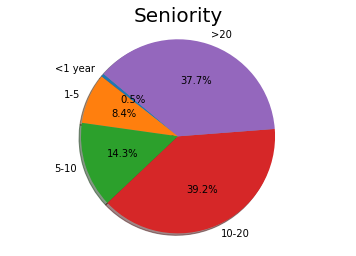

In [0]:
labels = '<1 year' , '1-5', '5-10', '10-20', '>20'
sizes = [18221, 279788, 478017, 1312300,1262275]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title('Seniority',fontsize=20)
plt.show()

In [0]:
df_train.groupby(['Socio_Demo_03']).size()

Socio_Demo_03
1     499949
2    1175007
3     984109
4     253218
5     438318
dtype: int64

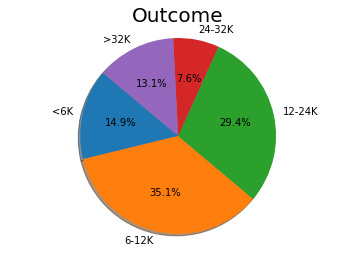

In [0]:
labels = '<6K', '6-12K', '12-24K', '24-32K', '>32K'
sizes = [499949, 1175007, 984109, 253218, 438318]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title('Outcome',fontsize=20)
plt.show()

In [0]:
df_train.groupby(['Socio_Demo_04']).size()

Socio_Demo_04
1    1866368
2    1484233
dtype: int64

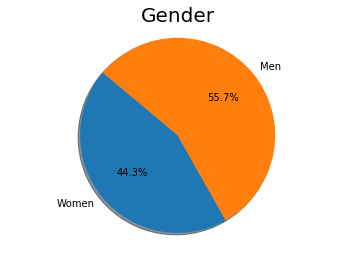

In [0]:
labels = 'Women', 'Men'
sizes = [1484233, 1866368]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title('Gender',fontsize=20)
plt.show()


In [0]:
df_train.groupby(['Socio_Demo_05']).size()

Socio_Demo_05
0    2657685
1     163495
2     155285
3     374136
dtype: int64

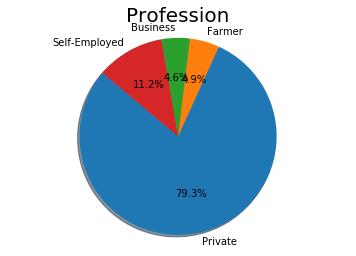

In [0]:
labels = 'Private' , 'Farmer', 'Business', 'Self-Employed'
sizes = [2657685, 163495, 155285, 374136]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title('Profession',fontsize=20)
plt.show()

In [0]:
print('Total code product:')
df_train['Cod_Prod'].unique()

Total code product:


array([2501, 2503,  601, 1011,  704,  301,  801, 9992,  201, 2301, 9993,
       9991, 2205, 2302, 2704, 1401, 1020, 1001, 3401, 2602,  506, 2707,
       1013, 2202, 2705, 2601, 2701, 2702,  706, 2102, 1007, 1801, 1804,
        707, 3001, 2201, 2203, 1022, 1306,  102, 2401, 1010, 1017,  503,
       2204, 1309, 2105,  103, 2106, 2706, 1805, 1002, 1803, 1301, 1310,
       2103, 1004, 1009, 1802, 1019, 1012, 2104,  702, 2206,  708,  705,
       1307, 1302, 1311, 1005,  101, 1006, 1501, 1304, 2703, 1008, 3101,
       1015, 1303, 1014,  703, 1021,  804, 1305, 1806, 2502,  803, 1308,
       2901, 1312,  502, 2801,  104,  504])

In [0]:
print('Frecuency of apparition for each Cod_Prod')
pd.value_counts(df_train['Cod_Prod'].values, sort=True)

Frecuency of apparition for each Cod_Prod


601     661756
301     426169
201     339686
2302    268166
9993    230423
9991    230423
2205    106478
2704    101727
2601    100163
704      91809
1011     78006
9992     71662
2301     66305
2705     52034
2503     46955
2501     46599
2602     42616
2707     31287
2701     29799
706      29228
1804     19882
2102     17157
1020     16175
801      15528
2106     15150
1801     14558
2201     13908
707      13722
3001     11184
1013     10731
         ...  
506        669
1019       605
3101       586
1012       558
1303       497
1501       485
2105       324
101        261
1005       259
1803       257
1010       219
1806       209
1006       152
104        105
504         69
703         67
1004        37
2801        34
1015        28
2502        24
804         21
1008        20
2104        19
1305        18
1014        17
803          9
2901         6
1308         5
502          3
1312         1
Length: 94, dtype: int64

<a id="transf"></a>
## **Preprocessing data**

In the next cell we carry out the transformation of the data with the two functions:

- ***tratamientoFecha***: (Datetreatment) is responsible for adding a new attribute corresponding to the number of days that have passed since 01-01-1950 for each record. 


- ***mapProduct:*** which is responsible for mapping the products to integer values ordered by their frequency of appearance in the training file.

In [0]:
# Train transformation
df_train = pF.tratamientoFecha(df_train)
df_train = pF.mapProduct(df_train)

# Test transformacion
df_test = pF.tratamientoFecha(df_test)
df_test = pF.mapProdByDict(df_test)

We use all the data for the creation of the different maps used for the generation of new features:

- ***mapAparicionProduct:*** generates a map of dates when the different products of the training set appear, assigning an ascending whole value.

- ***mapDiasInicio:*** generates a map to which you assign each training and test user the day on which you made the first purchase. This will be used to estimate the number of days since you registered in the database until you purchased the last product.

- ***mapYearPIB:*** loads a map of annual GDP per capita Spanish that must be in the same folder as this Notebook, whose name must be PIB.txt.

In [0]:
__ = pF.mapAparicionProd(df_train)
__ = pF.mapDiasInicio(df_train)
__ = pF.mapDiasInicio(df_test)
__ = pF.mapYearPIB()

### **Treatment of the time series**

In the next cell we will include as attributes the previous products purchased by the users, as well as the number of days elapsed since 01-01-1950 until the acquisition of each of the previous products.

In [0]:
# Number of previous products to considerate
nant = 8
incluir_num_dias = True

# Train
df_train = pF.addProdAnt(df_train, nant, incluir_num_dias)

# Test
df_test = pF.addProdAnt(df_test, nant, incluir_num_dias)

#### **Dataframe creation**
In the next cell we create three dataframes of the time series:
- *dfTr2model*: this training dataframe is what we will use to generate the prediction model.
- *dfTs2eval*: this test dataframe will be used to evaluate the results of the prediction. In this way, it will help us estimate how we will do it in prediction.
- *dfTs2predict*: this test dataframe is what we will use to carry out the prediction. The chosen data corresponds to the last entry for each user.

In [0]:
# Training subset
dfTr2model = pF.ultimoElementoSerie(df_train)

# Evaluation subset
dfTs2eval = pF.ultimoElementoSerie(df_test)

# Prediction subset
dfTs2predict = pF.createTest(df_test)

We add the number of products purchased as a feature. For the prediction dataframe we indicate that you take all the products purchased.

In [0]:
dfTr2model["Num_Prod_Ant"] = pF.numProductosComprados(df_train)
dfTs2eval["Num_Prod_Ant"] = pF.numProductosComprados(df_train)
dfTs2predict["Num_Prod_Ant"] = pF.numProductosComprados(df_train, test = True)

### Dataset reduction

**Sub-sampling**

Due to the large amount of data provided in the training file, we performed a random sub-sampling of the * train * dataframe in order to carry out the training of the models in a reasonable time.
This sub-sampling is performed in a stratified manner, as explained in the report.
In our case we are left with 20% of the train data, which is more than 120,000 records.

Once the training model to be implemented in the validation phase has been chosen, in order to estimate the goodness of the classifier on the test set, it is decided to evaluate the success rate on this set.

In [0]:
# Training subset
size = .2
dfTr2model = pF.subset(df_train, df_train.Cod_Prod, size = size)

# Test subset, for evaluation on this data set
size = .2
dfTs2eval = pF.subset(df_test, df_test.Cod_Prod, size = size)

/home/enigma-admin/.local/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


**Elimination of minority classes**

In order to eliminate the minority classes of the training set we *prune* it.

For the test case it would not be necessary because you do not need to model any class with this.

In [0]:
clases = 60
resto = False

dfTr2model = pF.classPrune2(dfTr2model, dfTr2model.Cod_Prod, nc = clases, resto = resto)

Number of classes: 60 
Percentage of data: 99.71766250820747 %
Minimum of samples: 215.0




<a id="feat"></a>
## Treatment of features

**New features**

In the next cell we add the characteristics to the data sets. Some of these functions use the maps loaded at the beginning of the Notebook. This process may take a while to run, but not more than 5 minutes (depends on the computer and the amount of data).

- **restaFechas**: is responsible for subtracting the days between the previous products that each customer has purchased and creating a corresponding column.


- **acontecimiento**: creates a column with the event of Cajamar according to the time in which the user buys the previous product. The event is marked by the merger of the rural banks.


- **addPIBAnt**: creates a column with the GDP per capita of the years in which the user buys the previous product.


- **addDiasInicioAnt**: create a column with the days that have passed since the user started buying, taking into account the date of purchase of the previous product.

In [0]:
dfTr2model = pF.restaFechas(dfTr2model)
dfTr2model = pF.acontecimiento(dfTr2model)
dfTr2model = pF.addPIBAnt(dfTr2model)
dfTr2model = pF.addDiasInicioAnt(dfTr2model)
print("Creation of features for training set completed.")

dfTs2eval = pF.restaFechas(dfTs2eval)
dfTs2eval = pF.acontecimiento(dfTs2eval)
dfTs2eval = pF.addPIBAnt(dfTs2eval)
dfTs2eval = pF.addDiasInicioAnt(dfTs2eval)
print("Creation of features for evaluation set completed.")

dfTs2predict = pF.restaFechas(dfTs2predict)
dfTs2predict = pF.acontecimiento(dfTs2predict)
dfTs2predict = pF.addPIBAnt(dfTs2predict)
dfTs2predict = pF.addDiasInicioAnt(dfTs2predict)
print("Creation of features for prediction set completed.")

Creation of features for training set completed.
Creation of features for evaluation set completed.
Creation of features for prediction set completed.


**Expansion of variables**

In the next cell we carry out the expansion of categorical variables, in which as many columns as possible values can be created the variable passed by argument.

In [0]:
variable = "Socio_Demo_05"

dfTr2model = pF.expandirVariable(dfTr2model, variable)
dfTs2eval = pF.expandirVariable(dfTs2eval, variable)
dfTs2predict = pF.expandirVariable(dfTs2predict, variable)

Expanding Socio_Demo_05 to dimension 4
Expanding Socio_Demo_05 to dimension 4
Expanding Socio_Demo_05 to dimension 4


#### **Feature selection**

In the next cell we eliminate attributes that have served us to calculate other variables but that we do not really have at the time of making the prediction.

The attributes to eliminate in this part are:

- **Cod_Fecha**: this attribute is eliminated, since in the real scenario we can not know when the user is going to buy the new product.


- **Cod_Fecha_Ant**: it is a column in date format when I bought the previous product, we eliminated it because we have already made the relevant transformations, and it is not useful in date format.


- **Num_Dias**: this column is not available because we do not have the current purchase date to know how many days have passed since 1950.

In [0]:
columns2drop = ["Cod_Fecha", "Cod_Fecha_Ant", "Num_Dias"]

dfTr2model = dfTr2model.drop(columns2drop, axis=1)
dfTs2eval = dfTs2eval.drop(columns2drop, axis=1)
dfTs2predict = dfTs2predict.drop(columns2drop,axis=1)

## **Machine Learning model**
In the next cell we extract the columns with which we will carry out the training of our classifier.



In [0]:
# We choose the training data by eliminating the product code and the user ID.
columns = list(dfTr2model.columns[2:len(dfTr2model.columns)])

print(columns)

['Socio_Demo_01', 'Socio_Demo_02', 'Socio_Demo_03', 'Socio_Demo_04', 'Cod_Prod_Ant1', 'Num_Dias_Ant1', 'Cod_Prod_Ant2', 'Num_Dias_Ant2', 'Cod_Prod_Ant3', 'Num_Dias_Ant3', 'Cod_Prod_Ant4', 'Num_Dias_Ant4', 'Cod_Prod_Ant5', 'Num_Dias_Ant5', 'Cod_Prod_Ant6', 'Num_Dias_Ant6', 'Cod_Prod_Ant7', 'Num_Dias_Ant7', 'Cod_Prod_Ant8', 'Num_Dias_Ant8', 'Diferencia_Fechas_1', 'Diferencia_Fechas_2', 'Diferencia_Fechas_3', 'Diferencia_Fechas_4', 'Diferencia_Fechas_5', 'Diferencia_Fechas_6', 'Diferencia_Fechas_7', 'AcontecimientoAnt', 'PIB_Ant', 'DiasDesde_Inicio', 'Socio_Demo_05_1', 'Socio_Demo_05_2', 'Socio_Demo_05_3', 'Socio_Demo_05_4']


<a id="train"> </a>
## **Training**

In the next cell we carry out the entry of our classifier *XGBoost* with the optimal parameters obtained from the validation phase. 

***Note: We should do a tuning of parameters to find the best values that improve the model.***

In [0]:
# Uncoment and comment from import ... If we have a trained model file
# we can load it with:
#import pickle
#estimator = pickle.load(open("trained_model.pickle.dat", "rb"))

import multiprocessing
nproc = multiprocessing.cpu_count() # For a fastest train, we use all cpu processors
print('Number of processors: ',nproc)
estimator=XGBClassifier(learning_rate = 0.1,
                       nthread = nproc,
                       base_score = 0.2,
                       n_estimators = 200,
                       seed = random_seed,
                       max_depth = 8)

Number of processors:  40


In [0]:
estimator.fit(dfTr2model[columns], dfTr2model.Cod_Prod)

XGBClassifier(base_score=0.2, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=40, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=206,
       silent=True, subsample=1)

In [0]:
# Un comment if we want save model to file
#import pickle
#pickle.dump(estimator, open("trained_model.pickle.dat", "wb"))

**Evaluation of the test data**

In order to observe the results of the test predictions, the trained classifier is evaluated on the subset of test data.

In [0]:
tsScore = estimator.score(dfTs2eval[columns], dfTs2eval.Cod_Prod)

print("Score obtained in test: "+ str(tsScore))

<a id="predict"> </a>
## **Prediction**

We make the prediction of the future products to be hired by the customers of the test dataset.

In [0]:
Cod_Prod_predicted = estimator.predict(dfTs2predict[columns])

/home/enigma-admin/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


**Creation of the results dataframe**

In the next cell, the creation of a dataframe with the customer's ID and the product code to be purchased is carried out.

Subsequently, an inverse mapping of these product codes is performed.

In [0]:
# We create a new column with the prediction.
dfresults = pd.DataFrame([dfTs2predict["ID_Customer"],Cod_Prod_predicted],["ID_Customer", "Cod_Prod"]).transpose()

# The mapping of the products is carried out in reverse.
dfresults = pF.getDfMap(dfresults)

dfresults.head()

,ID_Customer,Cod_Prod
0,B0676372,0301
1,B0676373,0301
2,B0676374,9993
3,B0676376,9991
4,B0676377,0301


**Export of results**

Finally, we export the dataframe with the results to the output format: ID_Customer, Cod_Prod

In [0]:
fileName = "output_prediction.csv"
dfresults.to_csv(fileName, encoding='utf-8', index=False)